<!-- ---
title: "Regression Lab: Predicting Height from Physical Traits"
author: "Mario Guarracino"
date: "2025-04-16"
format: html
editor: visual
--- -->

## 🎯 Objective

Background: In a nearby university, the flag from the Rectors' office has been stolen 😱.
Police have collected the following evidence from the crime scene:
1. A foot print of estimated *size 41* was found, and the shoe type was probably a boot, a sandal, or a sneaker 👞.
2. A bracelet was lost by the intruder, whose *wrist circumference* has been estimated in 16cm 🔗,
3. A *handprint* with a span of 20cm was discovered ✋,
4. A *backpack*, whose weight is 6kg, has been lost by the thief 🎒.

Police think that the robbery was made by a student and asked data analytics professors to collect data from their students to estimate the culprit's height from the crime scene evidences.

In this lab, you will build and compare two models — **Multiple Linear Regression (LM)** and **K-Nearest Neighbors (KNN)** — to predict the culprit's height based on observable physical traits.

Your tasks:
1. Fit both models using all available variables.
2. Predict the culprit height.
3. Refine the model, minimizing RMSE by selecting the most relevant predictors.
4. Submit your predictions on a hidden test set.

## 🧩 Dataset

The data is divided into train and test data. We train our model on the *height_train_data* and later on we will assess the performance of our model using the *height_test_data*.

In [1]:
df <- read.csv("/kaggle/input/height-prediction-dataset/height_train_data.csv",
                     colClasses = c("shoe_type" = "factor"))

In [2]:
str(df)

'data.frame':	200 obs. of  6 variables:
 $ foot_size          : num  39.5 41 38.5 40.5 40.5 42.5 41 40 42 39.5 ...
 $ wrist_circumference: num  15.6 15.5 17.2 15.5 14.2 ...
 $ hand_span          : num  17.5 18.7 19.4 18.9 19.9 ...
 $ backpack_weight    : num  4.31 5.18 7.43 4.95 4.58 ...
 $ shoe_type          : Factor w/ 3 levels "boot","sandal",..: 1 3 2 2 1 2 2 2 1 1 ...
 $ height             : num  172 169 166 181 163 ...


In [3]:
summary(df)

   foot_size     wrist_circumference   hand_span     backpack_weight 
 Min.   :34.50   Min.   :11.23       Min.   :14.99   Min.   :0.3105  
 1st Qu.:38.50   1st Qu.:14.88       1st Qu.:18.69   1st Qu.:4.0712  
 Median :40.00   Median :15.83       Median :19.98   Median :4.9019  
 Mean   :39.94   Mean   :15.90       Mean   :19.93   Mean   :4.9918  
 3rd Qu.:41.00   3rd Qu.:16.83       3rd Qu.:20.92   3rd Qu.:5.9942  
 Max.   :44.50   Max.   :19.88       Max.   :24.45   Max.   :8.5055  
   shoe_type      height     
 boot   :80   Min.   :159.1  
 sandal :51   1st Qu.:167.8  
 sneaker:69   Median :170.9  
              Mean   :171.1  
              3rd Qu.:174.7  
              Max.   :184.5  

In [4]:
head(df, 5)

,foot_size,wrist_circumference,hand_span,backpack_weight,shoe_type,height
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,39.5,15.64147,17.45528,4.308839,boot,171.9119
2,41.0,15.47032,18.67386,5.182475,sneaker,168.8191
3,38.5,17.22940,19.40691,7.431335,sandal,165.7507
4,40.5,15.48208,18.85207,4.953316,sandal,180.8182
5,40.5,14.22567,19.94765,4.581266,boot,163.3760


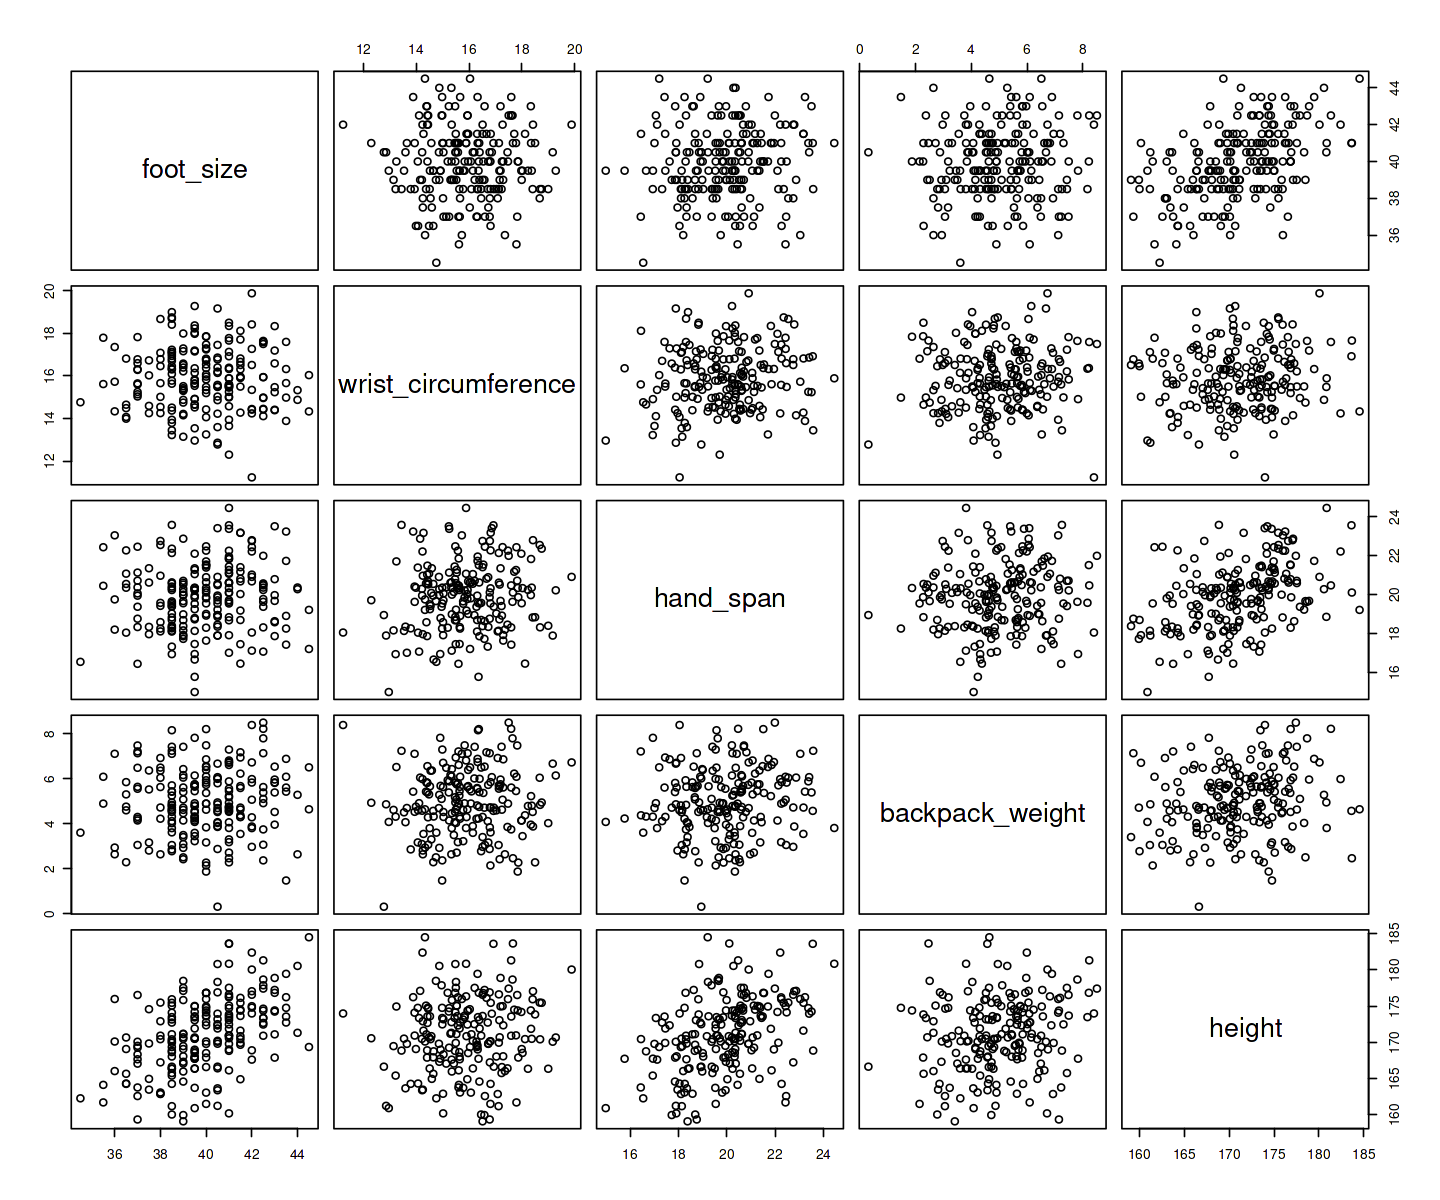

In [5]:
options(repr.plot.width = 12, repr.plot.height = 10)
pairs(df[sapply(df, is.numeric)])

## 🔍 Fit Linear Regression

Start with a multiple linear regression using all variables.

With $p$ predictors, the multiple linear regression model takes the form 
$$Y = \beta_0 + \beta_{1}X_1 + \beta_{2}X_2 + ... + \beta_{p}X_p + \epsilon$$

Where $X_j$ represents the j-th predictor and $\beta_j$ quantifies the association between that variable and the response. 

Here our response variable is the $Height$ and our predictors are $foot\_size, wrist\_circumference, hand\_span,$ and the $backpack\_weight$.

In [6]:
#   In R we can separate the LHS of an equation from 
# the RHS using the tilde (~) operator.
model_lm <- lm(height ~ ., data = df)

In [7]:
summary(model_lm)


Call:
lm(formula = height ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5788  -2.2679   0.0569   2.5196  11.4341 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          94.2950     7.0360  13.402  < 2e-16 ***
foot_size             1.2353     0.1459   8.469 6.21e-15 ***
wrist_circumference   0.2287     0.1925   1.189   0.2361    
hand_span             1.1213     0.1662   6.746 1.72e-10 ***
backpack_weight       0.3428     0.1904   1.800   0.0734 .  
shoe_typesandal      -1.3190     0.7143  -1.847   0.0663 .  
shoe_typesneaker      0.3140     0.6559   0.479   0.6327    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.975 on 193 degrees of freedom
Multiple R-squared:  0.4253,	Adjusted R-squared:  0.4075 
F-statistic: 23.81 on 6 and 193 DF,  p-value: < 2.2e-16


The summary result states that:

$$\hat{Y} = 94.2950 + (1.2353 \times \text{foot\_size)} + 
(0.2287 \times \text{writs\_circumference)} + (1.1213 \times \text{hand\_span)}+
(0.3428 \times \text{bakcpack\_weight)} - 
(1.3190 \times \text{shoe\_typesandal)} + (0.3140 \times \text{shoe\_typesneaker)}$$

## 📏 Predict Your Height

Input your personal data and get a prediction:

In [8]:
my_data <- data.frame(
    foot_size = 45,
    wrist_circumference = 18,
    hand_span = 22,
    backpack_weight = 8,
    shoe_type = factor("sneaker", levels = levels(df$shoe_type))
)

In [9]:
lm_pred <- predict(model_lm, newdata = my_data)
cat("Linear regression prediction for your height: ", round(lm_pred, 2), "cm\n")

Linear regression prediction for your height:  181.73 cm


## 📊 Plot Residuals

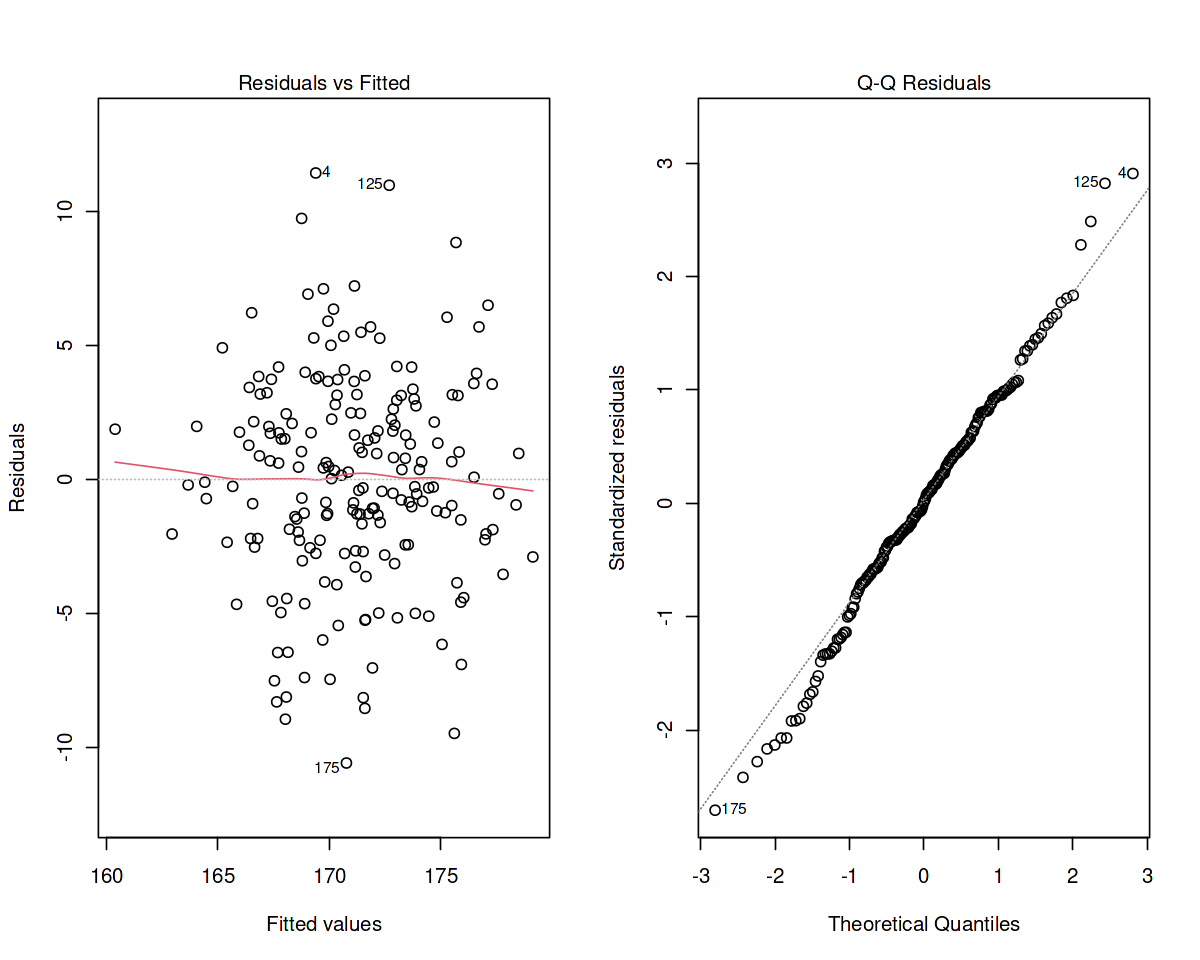

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow = c(1, 2))
plot(model_lm, which = 1) # Residuals vs. Fitted
plot(model_lm, which = 2) # Normal Q-Q

## 🤖 Fit KNN Model

[K-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

KNN is a non-parametric, instance-based learning algorithm used for classification and regrssion. Given a new data piont, it:
1. Computes the distance to all points in the training set.
2. Selects the K closest neighbors.
3. Predicts the output based on the majority vote (classification) or average (regression) of these neighbors.

In [11]:
#   This library contains functions to streamline the model 
# training process for complex regression and classification
# problems.
library(caret)

Loading required package: ggplot2



Loading required package: lattice




Attaching package: ‘caret’




The following object is masked from ‘package:httr’:

    progress




Prepare the dummy variables for categorical data

In [12]:
# Selects all the columns except "height"
predictors <- df[, names(df) != "height"] # predictors <- subset(df, select = -height)

# Converting categorical variables into dummy variables.
dummies <- dummyVars(~ ., data = predictors)

# Generating a matrix of dummy variables (all numeric)
data_transformed <- data.frame(predict(dummies, newdata = predictors))

# Adding the original height column back into the dataset
data_transformed$height <- df$height
head(data_transformed, 5)

,foot_size,wrist_circumference,hand_span,backpack_weight,shoe_type.boot,shoe_type.sandal,shoe_type.sneaker,height
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,39.5,15.64147,17.45528,4.308839,1,0,0,171.9119
2,41.0,15.47032,18.67386,5.182475,0,0,1,168.8191
3,38.5,17.22940,19.40691,7.431335,0,1,0,165.7507
4,40.5,15.48208,18.85207,4.953316,0,1,0,180.8182
5,40.5,14.22567,19.94765,4.581266,1,0,0,163.3760


Randomly split 70% of the data for training the model and the rest 30% for testing the model.

In [13]:
# By using the set.seed() function, we guarantee that the same random values are produced each time we run the code.
set.seed(42)
train_index <- createDataPartition(data_transformed$height, p = 0.7, list = FALSE)
train_set <- data_transformed[train_index, ]
test_set <- data_transformed[-train_index, ]

In [14]:
knn_model <- train(height ~ ., data = train_set, method = "knn",
                  tuneGrid = expand.grid(k = c(3, 5, 7)))

## 👟 Predict Your Height with KNN

In [15]:
# Applying the same dummy variable transformation to our my_data
my_data_knn <- data.frame(predict(dummies, newdata = my_data))

# Predict height based on the trained K-NN model
knn_pred <- predict(knn_model, newdata = my_data_knn)
cat("KNN prediction for your height: ", round(knn_pred, 2), "cm\n")

KNN prediction for your height:  178.13 cm


## 🔁 Compare Models on Test Split

To compare our models we use the Root Mean Squared Errro or simply RMSE which tells us how far off our model's predictoins are from the actual values. 

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }
$$

In [16]:
set.seed(42)
train_index <- createDataPartition(df$height, p = 0.7, list = FALSE)

train_set_lm <- df[train_index, ]
test_set_lm  <- df[-train_index, ]

train_set_knn <- data_transformed[train_index, ]
test_set_knn <- data_transformed[-train_index, ]

In [17]:
model_lm <- lm(height ~ ., data = train_set_lm)
lm_test_pred <- predict(model_lm, newdata = test_set_lm)
lm_rmse <- sqrt(mean((test_set$height - lm_test_pred)^2))
cat("LM Test RMSE:", lm_rmse, "\n")

LM Test RMSE: 3.738484 


In [18]:
knn_model <- train( height ~ ., data = train_set_knn,
                  method = "knn", 
                  tuneGrid = data.frame(k = 3))

knn_test_pred <- predict(knn_model, newdata = test_set_knn)
knn_rmse <- sqrt(mean((test_set$height - knn_test_pred)^2))
cat("KNN Test RMSE (k=3):", knn_rmse, "\n")

KNN Test RMSE (k=3): 4.576583 


The less RMSE(Root means squared error) for a model, the better it is predicting.
Therefore, We can see that our multiple linear regression is performing better, we choose it for our final prediction on the *height_test_data*.

## 🛠️ Your Turn: Optimize the Linear Model

Try to remove irrelevant variables or apply transformations to reduce RMSE. Compare the new model to your baseline.

Let's jump back in to the result of the summary(model_lm):

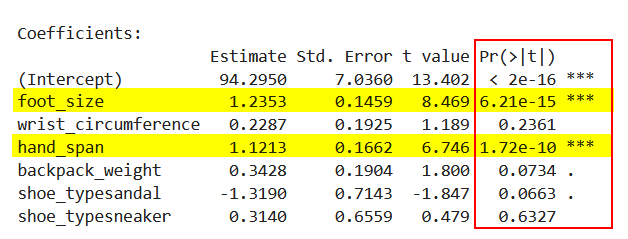

The foot_size and hand_span are the only coefficient that are statistically significant and relevant. We only choose these two to enhance our model performance.

In [19]:
model_lm_opt <- lm(height ~ foot_size + hand_span, data = train_set_lm)

lm_opt_test_pred <- predict(model_lm_opt, newdata = test_set_lm)

lm_opt_rmse <- sqrt(mean((test_set$height - lm_opt_test_pred)^2))

cat("LM Optimized Test RMSE:", lm_opt_rmse, "\n")

LM Optimized Test RMSE: 3.735952 


## 🧪 Final Test Prediction (Instructor Dataset)

Use your best model to predict height for the individuals in height_test_input.csv (provided by the instructor). Then, submit a CSV with your predicted heights.

In [20]:
final_test <- read.csv("/kaggle/input/height-prediction-dataset/height_test_data.csv")

final_pred <- predict(model_lm_opt, newdata = final_test)
fina_pred <- round(final_pred, 4)
submission <- data.frame(final_pred)

write.csv(submission, "79182_SOLEIMANIAN.csv", row.names = FALSE)

##  🎉 Good Luck!

Remember: your goal is to build the most accurate model in terms of RMSE and Adjusted R². Happy modeling